In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles
import glob 

In [2]:
dbfiles = glob.glob('*10yrs.db')

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with constraint night > 913 and night < 1278 for columns ['night', 'fieldRA', 'fieldDec']
Found 204164 visits
Running:  ['opsim_Count_night_night_gt_913_and_night_lt_1278_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night > 913 and night < 1278" constraint now.


/Users/yoachim/lsst/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.1/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/yoachim/git_repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:106: UserWarning: Optimal bin calculation tried to make 686 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
/Users/yoachim/lsst/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.1/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 69.5302  dipole: lon: -36.6007, lat: -75.4317, amp: 8.11632
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with constraint night > 913 and night < 1278 for columns ['night', 'fieldRA', 'fieldDec']
Found 203783 visits
Running:  ['opsim_Count_night_night_gt_913_and_night_lt_1278_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night > 913 and night < 1278" constraint now.


/Users/yoachim/lsst/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.1/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/yoachim/git_repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:106: UserWarning: Optimal bin calculation tried to make 620 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
/Users/yoachim/lsst/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.1/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 60.081  dipole: lon: 30.1218, lat: -82.2522, amp: 35.8449
  warnings.warn(


Plotting complete.


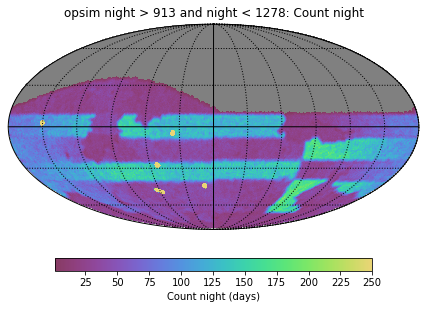

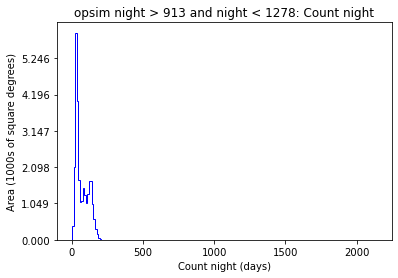

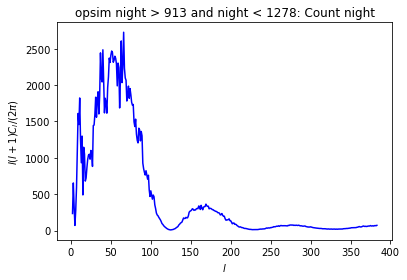

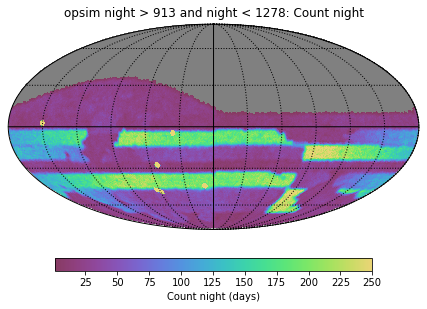

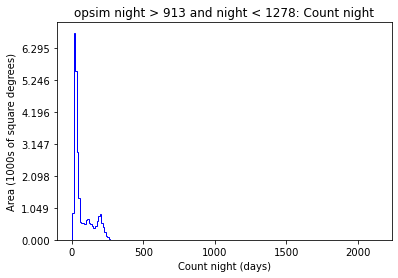

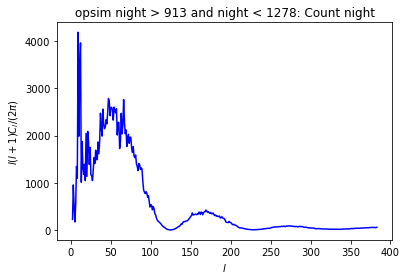

In [3]:
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)
for filename in dbfiles:
    conn = db.OpsimDatabase(filename)
    runname = filename.replace('_10yrs.db','')
    bundleList = []
    sql = 'night > %i and night < %i' % (365.25*2.5, 365.25*3.5)
    metric = metrics.CountMetric(col='night')
    slicer = slicers.HealpixSlicer()
    plotDict = {'colorMax': 250}
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict))
    bd = metricBundles.makeBundlesDictFromList(bundleList)
    bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
    bg.runAll()
    bg.plotAll(closefigs=False)